# 03_Classification

In [225]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [113]:
warnings.filterwarnings('ignore')

In [114]:
mnist=fetch_mldata('MNIST original')

In [115]:
# check the structure of mnist
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [116]:
X,y=mnist.data,mnist.target

In [126]:
X.shape

(70000, 784)

In [129]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [120]:
# get and visualize one digit from the datase
some_digit=X[36000] # get the 36000th digit in the dataset
some_digit.shape

(784,)

In [121]:
def imshowImageofInstance(index):
    someInstance=X[index]
    someImage=someInstance.reshape(28,28)
    plt.imshow(someImage,cmap=matplotlib.cm.binary,interpolation='nearest')
    plt.axis('off')
    plt.show()    

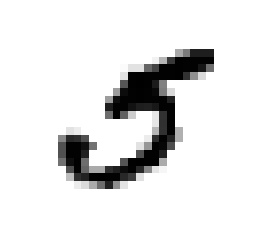

In [122]:
%matplotlib inline
imshowImageofInstance(36000)

In [124]:
y[36000]

5.0

In [35]:
# split the dataset into the training dataset and testing dataset
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [43]:
#shuffle the training dataset so that when we use cross validation we can get the similar dataset
shuffled_Index=np.random.permutation(60000)
X_train,y_train=X[shuffled_Index],y[shuffled_Index]

# training a binary classifier to classify 5s and Non-5s

In [51]:
# construct the a target vector
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [64]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [125]:
sgd_clf.predict([some_digit])

array([ True])

# Evaluate the performance of the classifier based on the cross-validation

In [65]:
# implement the cross validation by own
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

kfolds=StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in kfolds.split(X_train,y_train_5):
    sgd_clf_clone=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    
    X_test_folds=X_train[test_index]
    y_test_folds=y_train_5[test_index]
    
    sgd_clf_clone.fit(X_train_folds,y_train_folds)
    y_pred=sgd_clf_clone.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    accuracy=n_correct /len(y_pred)*100
    print('Accuracy in this fold: {:.2f}%'.format(accuracy))

Accuracy in this fold: 89.85%
Accuracy in this fold: 96.19%
Accuracy in this fold: 96.31%


In [67]:
# Using the built-in Cross-validation -- cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.8985 , 0.9619 , 0.96315])

# Build a dumb classifier that can classify all the samples to the non-5s class

In [76]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [77]:
never5Clf=Never5Classifier()
never5Clf.fit(X_train,y_train_5)
y_pred_never5=never5Clf.predict(X_train)

In [90]:
n_correct=sum(y_pred_never5.ravel()==y_train_5)
accuracy=n_correct/len(y_train_5)
print('Accuracy: ',accuracy)

Accuracy:  0.90965


In [91]:
cross_val_score(never5Clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9106 , 0.90925, 0.9091 ])

# Confusion Matrix

To build the confusion matrix,we have to have a set of prediction values, so they can be used to compare with the actual values.
To get the predicted values, we can use the function of cross_val_predict()

In [93]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [110]:
#build the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[52427,  2152],
       [ 1377,  4044]], dtype=int64)

In [96]:
confusion_matrix(y_train_5,y_train_pred)

array([[52427,  2152],
       [ 1377,  4044]], dtype=int64)

In [99]:
y_train_perfect_predictions=y_train_5.copy()

In [100]:
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

# Precision Recall F1-Measure

In [106]:
# precision is the ratio of predicted true positive samples out of predicted positive samples=(TP/(TP+FP))
# recall is the ratio of predicted true postive samples out of the true samples in the dataset=(TP/(TP+FN))
# F1-measure is harmonic mean of precision and recall which gives more weights to low values
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
precision=precision_score(y_train_5,y_train_pred)
recall=recall_score(y_train_5,y_train_pred)
f1=f1_score(y_train_5,y_train_pred)

In [107]:
precision

0.6526791478373144

In [111]:
52427/(52427+1377)

0.9744071072782693

In [108]:
recall

0.7459878251245158

In [109]:
f1

0.6962210553499182

# Precision/Recall Tradeoff

In [140]:
y_scores=sgd_clf.decision_function([some_digit])
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

In [133]:
y_scores_all=sgd_clf.decision_function(X_train)

In [197]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [198]:
y_scores

array([ 584241.94837514, -295483.17463541, -223684.50897041, ...,
       -613712.67783998, -405107.75940756, -425394.97476684])

In [199]:
y_scores_all

array([ 175474.13096477,  -68192.49251235, -312142.0405175 , ...,
       -343577.75957304, -132571.41071474, -127987.60811074])

In [200]:
# for these scores, compute the precision and recall for all possible threshold using the precision_recall_curve()
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [201]:
thresholds

array([-1867474.4104284 , -1867238.38935365, -1866824.05893411, ...,
        1005677.42815363,  1039691.62722924,  1045392.05359952])

In [202]:
y_scores

array([ 584241.94837514, -295483.17463541, -223684.50897041, ...,
       -613712.67783998, -405107.75940756, -425394.97476684])

In [203]:
precisions

array([0.09054467, 0.09052948, 0.09053099, ..., 1.        , 1.        ,
       1.        ])

In [204]:
recalls

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [205]:
# check the precision when the threshold is set as -1867474.4104284
threshold=-1867474.4104284
y_train_preds=(y_scores>threshold)
precision_score(y_train_5,y_train_preds)

0.0905446710427419

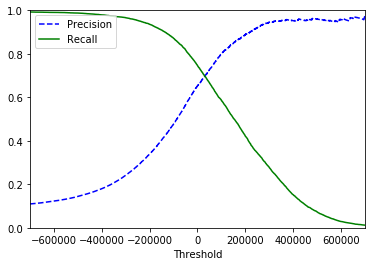

In [206]:
# plot the precision against threshold and recall against threshold
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    # the last values in precisions and recalls are 1. and 0.,respectively, they do not have corresponding
    # threshold, it just ensures the graphs begin at the y-axis
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.xlim([-700000,700000])
    plt.ylim([0,1])
    plt.show()
%matplotlib inline    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

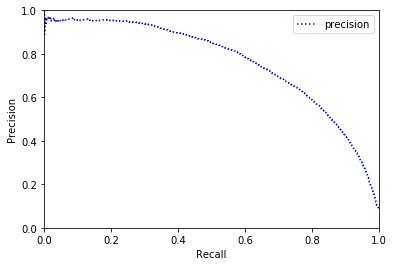

In [207]:
# plot the curve precision vs recall
plt.plot(recalls[:-1],precisions[:-1],'b:',label='precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.show()

In [208]:
y_train_90_precision=(y_scores>=300000)

In [209]:
precision_score(y_train_5,y_train_90_precision)

0.9454545454545454

In [210]:
recall_score(y_train_5,y_train_90_precision)

0.27817745803357313

# ROC curve

In [211]:
# To plot the roc curve, you need to get the TPR and FRP
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [212]:
thresholds

array([ 1045393.05359952,  1045392.05359952,   845613.74624476, ...,
       -1867238.38935365, -1867474.4104284 , -2955294.62600882])

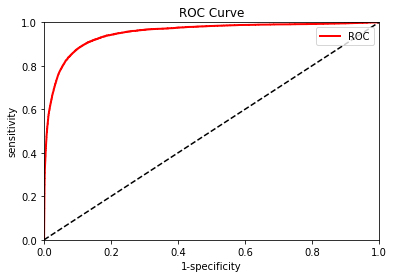

In [220]:
# plot roc curve (tpr vs fpr)
%matplotlib inline
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,color='r',label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('1-specificity')
    plt.ylabel('sensitivity')
    plt.legend(loc='upper right')
    plt.title('ROC Curve')
    plt.show()

plot_roc_curve(fpr,tpr,label='ROC')

In [223]:
# how to calculate the ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9513846119236683

# The performance comparison of two classifiers based on the roc curve and roc auc

In [227]:
# build a random forest classifier
rdf_clf=RandomForestClassifier(random_state=42)
rdf_clf.fit(X_train,y_train_5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [230]:
y_probas_forest=cross_val_predict(rdf_clf,X_train,y_train_5,cv=3,method='predict_proba') #there are two values in each row, which
# means the probability of the instance belongs to each of the class respectively.